<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create function that downloads data from URL.

In [0]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(HOUSING_PATH):
    os.makedirs(HOUSING_PATH)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()
 


Now download the data.

In [0]:
fetch_housing_data()

Load the downloaded csv file into a variable and display it. Create afunction to do this.

In [0]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  housing_file=housing_path+'/housing.csv'
  return pd.read_csv(housing_file)

Read csv using load_housing data function and display it.

In [4]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Here only ocean_proximity is text field. So check the distinct values in this column and their counts.

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Check the stats of other columns as they are numeric values.

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plot histograms for each column.

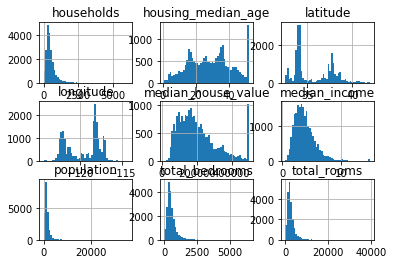

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50)
plt.show()

Now split the data as training set and test set.

In [0]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

train_set,test_set=split_train_test(housing, 0.2)

Now visualize the data on scatter plot using the longitude and lattitude.

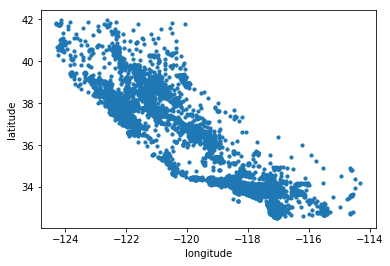

In [30]:
train_set.plot(x="longitude",y="latitude",kind="scatter")

Above graph looks like california. But there is so much thinckness in some areas. So set alpha to 0.1 so taht Density will be clear.

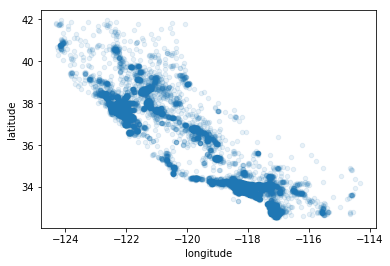

In [28]:
train_set.plot(x="longitude",y="latitude",kind="scatter",alpha=0.1)

Now change the each point size based on it's district's population. And also set the color to represent median_house_value.

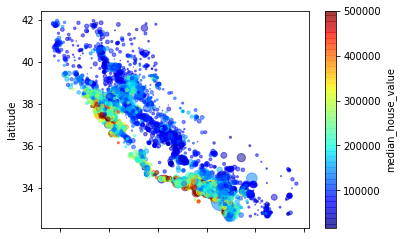

In [40]:
train_set.plot(x="longitude",y="latitude",kind="scatter",alpha=0.5,s=train_set["population"]/100,c="median_house_value",cmap=plt.get_cmap("jet"))

Plot a scatter plot using values medin_income and median_house_value

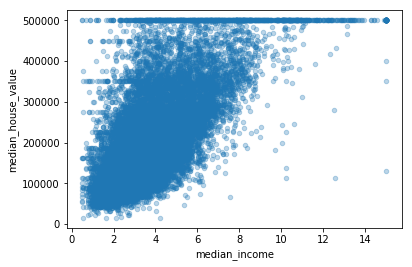

In [45]:
housing.plot(x="median_income",y="median_house_value",kind="scatter", alpha=0.3)

If we have null values in some columns, training algorithms tend to give incorrect results. so you need to fill them with median values. We use imputer from scikit to do this. Imputer works with only numbers. So we will remove the string column from housing dataset and apply imputer.

In [0]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

housing_num=housing.drop(labels="ocean_proximity",axis=1)

imputer.fit(housing_num)
X=imputer.transform(housing_num)

housing_tr=pd.DataFrame(X,columns=housing_num.columns)